In [2]:
import pandas as pd
import ydata_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [26]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## EDA
Explanatory Data Analysis: 探索的データ解析
データに触れてみて、データを視覚化したり、データのパターンを探したり、特徴量やターゲットの関係性/相関性を感じるとるのが目的。

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

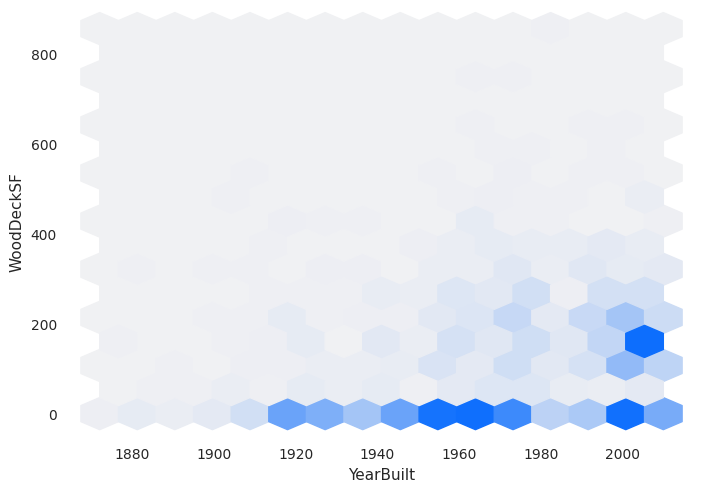

In [4]:
ydata_profiling.ProfileReport(train)

## Label Encode
LabelEncoderは、文字列のカテゴリを数値に変換するためのエンコーダー。
取り扱うデータのデータタイプを確認して、objetctタイプのデータが存在した場合は、Label Encodeする。

In [17]:
train.select_dtypes(include=['object']).dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [33]:
train['SaleCondition'].unique()
# print(train.shape[1,])

array([4, 0, 5, 1, 2, 3], dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:, i].dtypes == 'object':
        le = LabelEncoder()
        le.fit(list(train.iloc[:, i].values) + list(test.iloc[:, i].values))
        train.iloc[:, i] = le.transform(list(train.iloc[:, i].values))
        test.iloc[:, i] = le.transform(list(test.iloc[:, i].values))

In [34]:
train["SaleCondition"].unique()

array([4, 0, 5, 1, 2, 3], dtype=object)

## nan（欠損値）の対処

In [68]:
train_nan = train.isnull().sum()
train_nan = train_nan[train_nan > 0]
test_nan = test.isnull().sum()
test_nan = test_nan[test_nan > 0]
print("学習データの欠損値：")
print(train_nan)
print()
print("テストデータの欠損値：")
print(test_nan)

学習データの欠損値：
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

テストデータの欠損値：
LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64


In [67]:
train_id = train["Id"]
test_id = test["Id"]

y_train = train["SalePrice"]
X_train = train.drop(columns=["Id", "SalePrice"])
X_test = test.drop(columns=["Id"])

Xmat = pd.concat([X_train, X_test])
# 欠損値の多い列を削除
Xmat = Xmat.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], axis=1)
# 欠損値の少ないカラムは中央値で埋める
Xmat = Xmat.fillna(Xmat.median())


# 欠損値の確認
# Xmat.isnull().any(axis=1) # この「行」に欠損値があるかどうかをTrue/Falseで返す（indexは行名）
# Xmat.isnull().sum() > 0 # この「列」に欠損地があるかどうかをTrue/Falseで返す(indexは列名)
# Xmatは「行」に対するブールSeriesである必要がある
# 書き方1
# Xmat.loc[:, Xmat.isnull().sum() > 0]
# 書き方2
# Xmat[Xmat.isnull().any(axis=1) > 0]
# 書き方3
Xmat.isnull().sum()[Xmat.isnull().sum() > 0]

<ipython-input-67-82248b337e19>:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Xmat = Xmat.fillna(Xmat.median())


Series([], dtype: int64)

## 新しい列を作成
例. 地下室の面積(TotalBsmtSF)と1階のフロアの面積(1stFlrSF)と2階のフロアの面積(2ndFlrSF)を組み合わせて、家全体の面積(TotalSF)を作成

In [71]:
Xmat["TotalSF"] = Xmat["TotalBsmtSF"] + Xmat["1stFlrSF"] + Xmat["2ndFlrSF"]
Xmat.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,3,8450,1,2,3,3,0,4,0,...,0,3,4,4,0,2,2008,8,4,2566.0
1,20,3,9600,1,2,3,3,0,2,0,...,0,3,4,4,0,5,2007,8,4,2524.0
2,60,3,11250,1,2,0,3,0,4,0,...,0,3,4,4,0,9,2008,8,4,2706.0
3,70,3,9550,1,2,0,3,0,0,0,...,0,3,4,4,0,2,2006,8,0,2473.0
4,60,3,14260,1,2,0,3,0,2,0,...,0,3,4,4,0,12,2008,8,4,3343.0


## SalesPriceが正規分布に従っているか？

予測しようとしている値が正規分布に従った方が精度がよくなる

## ヒストグラムで分析
- 横軸にSalesPrice
- 縦軸に割合

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


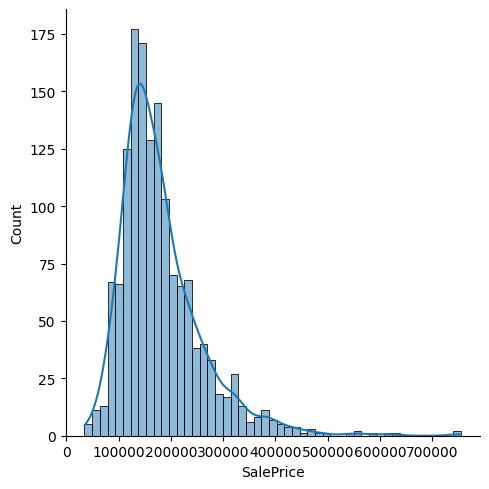

In [76]:
sns.displot(y_train, kde=True)
plt.show()

正規分布ではない（左に偏っている）

In [77]:
y_train.sort_values(ascending=False).head()

691     755000
1182    745000
1169    625000
898     611657
803     582933
Name: SalePrice, dtype: int64

## 対数計算とは
何乗すればよいかを求める計算

### e.g.
log10(100) = 10を何乗すれば100になるか？ = 2

### 今回の計算
log(y_train) = log np.e(y_train)

※np.e=2.718281828459045(Numpyの定数として定義されている)

log2.718281828459045(755000) = 13.534473

log2.718281828459045(140000) = 11.849398

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


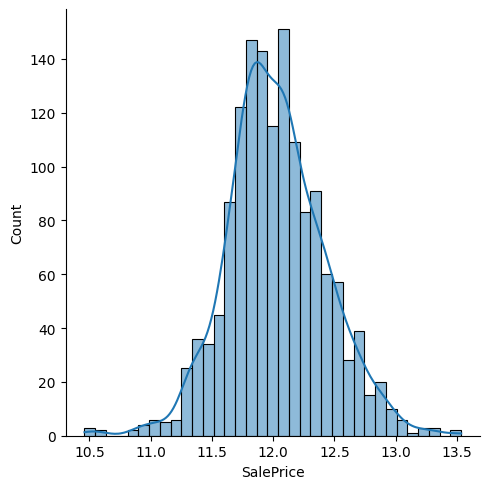

In [78]:
# 対数計算
y_train = np.log(y_train)
sns.displot(y_train, kde=True)
plt.show()

# ランダムフォレストで特徴量の重要度にアクセス
相関係数でFeatureの重要度を判断するのではなく、機械学習のアルゴリズムであるランダムフォレストでFeatureの重要度を判断。

In [84]:
print(train.shape)
print(train.shape)
print(train.shape[0])
print(Xmat.shape)

(1460, 81)
(1460, 81)
1460
(2919, 77)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


ランダムフォレストを用いて、訓練完了


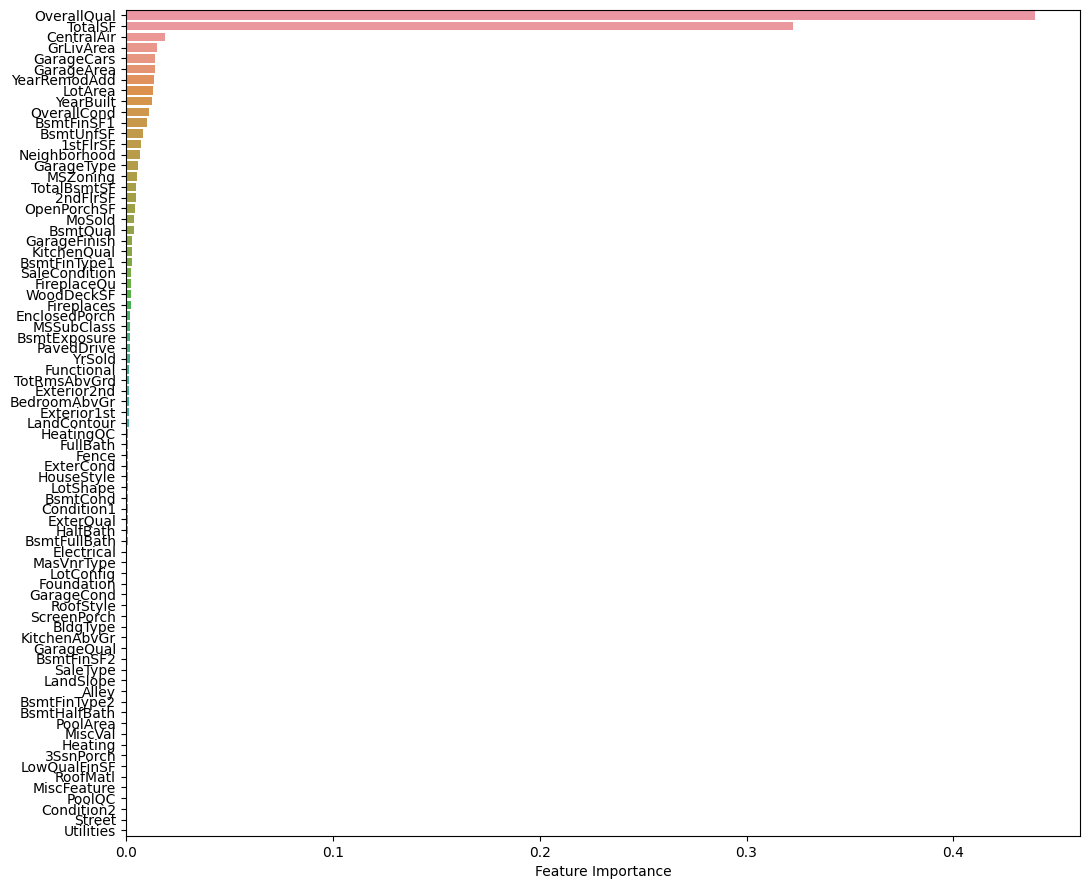

In [87]:
X_train = Xmat.iloc[:train.shape[0], :]
X_test = Xmat.iloc[train.shape[0]:, :]

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=80, random_state=42, max_features='auto')
rf.fit(X_train, y_train)
print("ランダムフォレストを用いて、訓練完了")

# np.argsort()はソート結果の配列のインデックスを返す。引数の頭に"-"をつけると降順。
# "-rf.feature_importances_"を引数にする事で重要度の高い順にソートした配列のインデックスを返す
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))

sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("Feature Importance")
plt.tight_layout()
plt.show()

- OverallQualとTotalSFの重要度が突出して高い
- 用意されたデータの中でSalesPriceの予測に必要なfeatureは、少ししかない
- とりあえずは上位30個のFeatureを取ってきて、それをモデルに与え、訓練を実施。
  - 特徴量が多すぎると過学習になる可能性がある
  - モデルの複雑さを適度に抑える
  - 計算コストの削減
  - モデルの解釈性の向上
- 上位2個のFeatureを掛け合わせたものを、'Interaction'として新しいFeatureを作成。
  - 上位2つの特徴量（OverallQualとTotalSF）の間には、単独の特徴量では捉えられない相互作用が存在する可能性があります
  - 例えば：
    - 家の品質（OverallQual）が高い場合、面積（TotalSF）の増加が価格により大きな影響を与える
    - 逆に、面積が大きい場合、品質の向上が価格により大きな影響を与える
  - このような相互作用を捉えるために、2つの特徴量を掛け合わせた新しい特徴量を作成します

In [106]:
X_train = X_train.iloc[:, ranking[:30]]
X_test = X_test.iloc[:, ranking[:30]]

X_train["Interaction"] = X_train["OverallQual"] * X_train["TotalSF"]
X_test["Interaction"] = X_test["OverallQual"] * X_test["TotalSF"]


IndexError: positional indexers are out-of-bounds

# 標準化(Standardization)で特徴量（feature）の尺度を揃える
featureが複数ある場合、featureによって数字の大きさや単位が異なる。

例えば、カラムAの値が300cmでカラムBの値が3mの場合、何もしなければ値がそのまま代入されてしまうため、影響度が同じであってもカラムAの影響が大きくなってしまう。

標準化は、この数字の大きさや単位の影響をなくしてしまい、それぞれの尺度を同じ尺度の値に揃えるための手法。

In [97]:
# (値 - 平均) / 標準偏差
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()


## SalePriceと各Featureの関係を調べる
SalePrice / 各Featureのプロット図を表示

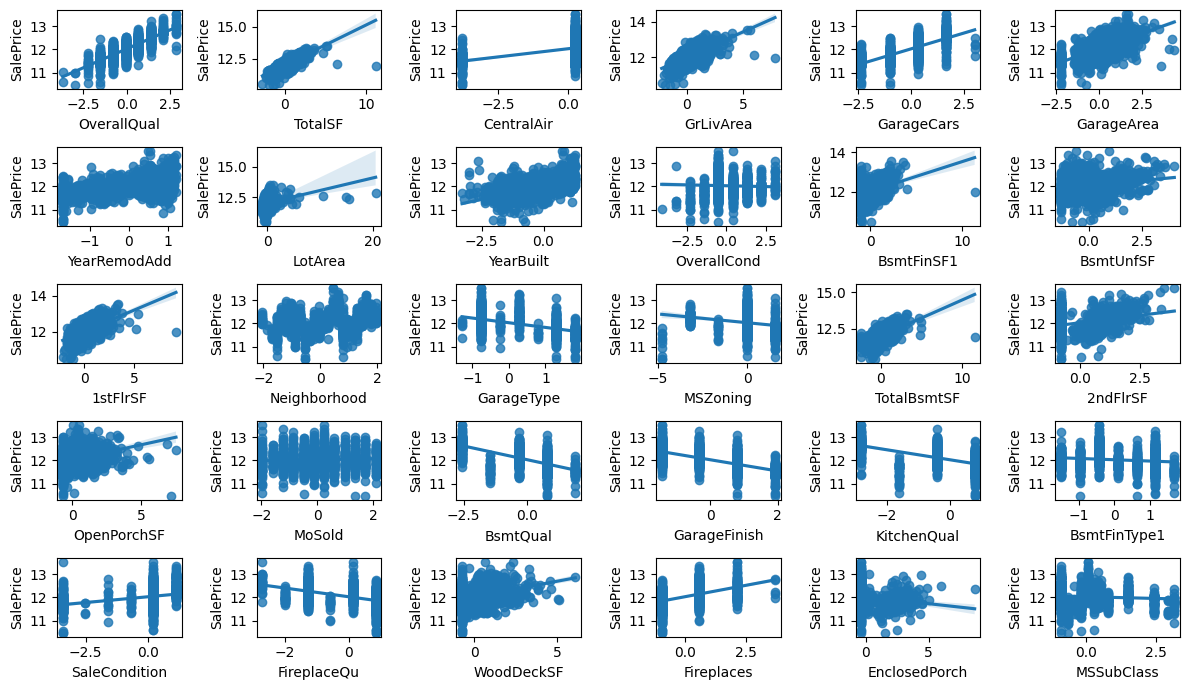

In [98]:
fig = plt.figure(figsize=(12, 7))

# 30個の図を表示
for i in np.arange(30):
    ax = fig.add_subplot(5, 6, i+1) # 5行6列の中のi+1番目の図を表示
    sns.regplot(x=X_train.iloc[:, i], y=y_train) # 散布図と回帰直線を表示

plt.tight_layout() # 文字が隣のグラフと重ならないようにする
plt.show()


## 外れ値（Outlier）を削除
TotalSF と GrLivArea の外れ値を削除


In [120]:
Xmat = X_train
Xmat['SalePrice'] = y_train

Xmat = Xmat.drop(Xmat[(Xmat['TotalSF'] > 5) & (Xmat['SalePrice'] < 12.5)].index)
Xmat = Xmat.drop(Xmat[(Xmat['GrLivArea'] > 5) & (Xmat['SalePrice'] < 13)].index)

y_train = Xmat["SalePrice"]
X_train = Xmat.drop(columns=["SalePrice"], axis=1)

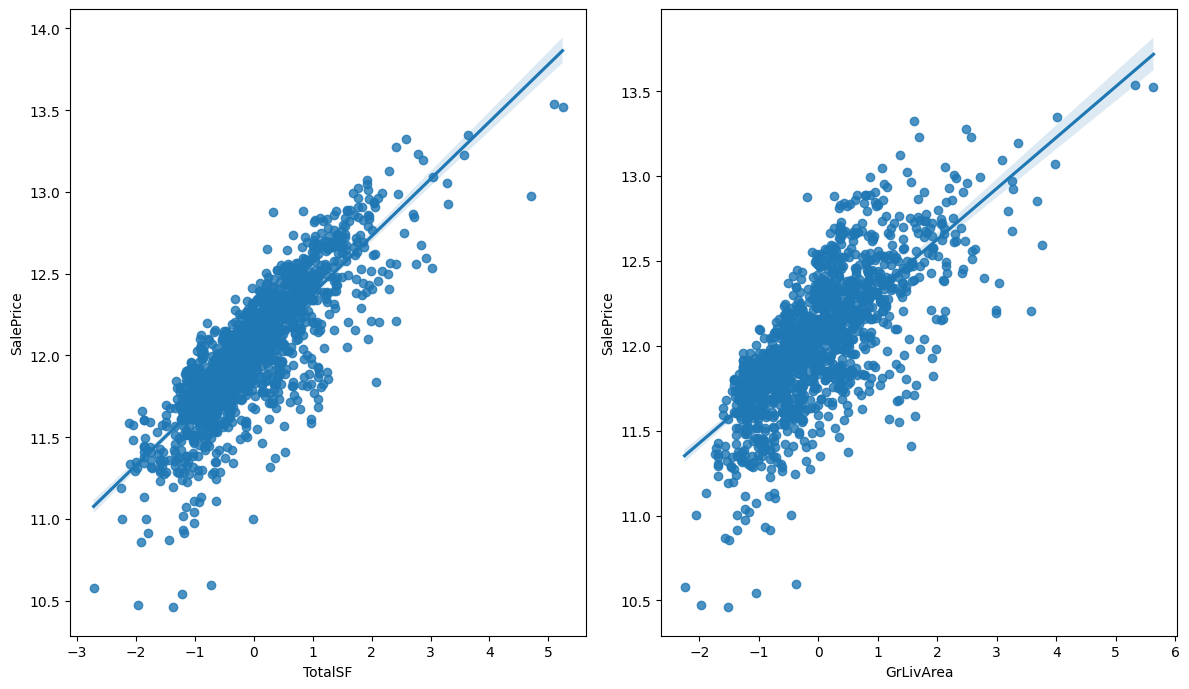

In [121]:
# 削除できたか確認
fig = plt.figure(figsize=(12, 7))

# 30個の図を表示

ax = fig.add_subplot(1, 2, 1)
sns.regplot(x=X_train.iloc[:, 1], y=y_train)

ax = fig.add_subplot(1, 2, 2)
sns.regplot(x=X_train.iloc[:, 3], y=y_train)


plt.tight_layout() # 文字が隣のグラフと重ならないようにする
plt.show()


EDA終了

## モデルの作成
## 線形回帰分析での予測


In [122]:
slr = LinearRegression()
slr.fit(X_train, y_train)

# 偏回帰係数（回帰方程式の各説明変数の係数）
print(slr.coef_[0])

# 切片
print(slr.intercept_)

0.09197562645663168
12.02728641794218


In [123]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1458, dtype: float64

In [126]:
# TODO: カラムがinfになってしまう
y_test_pred = np.exp(slr.predict(X_test))
y_test_pred

<ipython-input-126-e5944491ce83>:1: RuntimeWarning: overflow encountered in exp
  y_test_pred = np.exp(slr.predict(X_test))


array([3.8924818e+297,            inf,            inf, ...,
                  inf, 6.3284833e+283,            inf])

In [114]:
submission = pd.DataFrame({
    "Id": test_id,
    "SalePrice": y_test_pred
})
submission.to_csv("./house-prices-advanced-regression-techniques/eda.csv", index=False)
